Load modules

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsTransformer
from sklearn.neighbors import RadiusNeighborsTransformer
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#pip install --user xgboost
import xgboost as xgb

NOT USING T-Student test

Referência
https://towardsdatascience.com/paired-t-test-to-evaluate-machine-learning-classifiers-1f395a6c93fa

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

t, p = paired_ttest_5x2cv(estimator1=model_rf,estimator2=xgb_classifier,X=X, y=y)
alpha = 0.05

print('t statistic: %.3f' % t)
print('alpha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((-1), 784).astype('float32') / 255.0
y_train = y_train.reshape((-1)).astype('float32')

x_test = x_test.reshape((-1), 784).astype('float32') / 255.0
y_test = y_test.reshape((-1)).astype('float32')


4422102/4422102 [==============================] - 1s 0us/step


MNIST Original

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1), 784).astype('float32') / 255.0
y_train = y_train.reshape((-1)).astype('float32')

x_test = x_test.reshape((-1), 784).astype('float32') / 255.0
y_test = y_test.reshape((-1)).astype('float32')

Fitting Classifiers

In [ ]:

#====================== KNN =====================
k=5
model_knn = KNeighborsClassifier(n_neighbors = k)

model_knn.fit(x_train,y_train)

#print(cross_val_score(model_knn, x_test, y_test, cv = 10))
pred_knn = model_knn.predict(x_test)
#print('Accuracy of KNN: ', accuracy_score(pred_knn, y_test)*100)

# ======================= SVM ==============

model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)

#print(cross_val_score(model_svm, x_test, y_test, cv = 10))
pred_svm = model_svm.predict(x_test)
#print('Accuracy of SVM: ', accuracy_score(pred_svm, y_test)*100)

# ==================== Naive Bayes ================

model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

#print(cross_val_score(model_gnb, x_test, y_test, cv = 10))
pred_gnb = model_gnb.predict(x_test)
#print('Accuracy of NB: ', accuracy_score(pred_gnb, y_test)*100)


#===================== RandomForest ==========
clf = RandomForestClassifier(n_estimators = 9)
model_rf = clf.fit(x_train, y_train)

#print(cross_val_score(model_rf, x_test, y_test, cv = 10))
pred_rf = model_rf.predict(x_test)
#print('Accuracy of RF: ', accuracy_score(pred_rf, y_test)*100)


#================== XGBoost ===========================

# Train a model using the scikit-learn API
xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
xgb_classifier.fit(x_train, y_train)

#print(cross_val_score(xgb_classifier, x_test, y_test, cv = 10))
pred_xgb = xgb_classifier.predict(x_test)
#print('Accuracy of XGBoost: ', accuracy_score(pred_xgb, y_test)*100)

Cross validation

In [ ]:
import pandas as pd
results = pd.DataFrame()
results['KNN'] = cross_val_score(model_knn, x_test, y_test, cv = 20)
results['SVM'] = cross_val_score(model_svm, x_test, y_test, cv = 20)
results['NB'] = cross_val_score(model_gnb, x_test, y_test, cv = 20)
results['RF'] = cross_val_score(model_rf, x_test, y_test, cv = 20)
results['XGB'] = cross_val_score(xgb_classifier, x_test, y_test, cv = 20)
print(results)

      KNN    SVM     NB     RF    XGB
0   0.824  0.850  0.582  0.852  0.864
1   0.816  0.822  0.572  0.812  0.850
2   0.828  0.836  0.560  0.830  0.860
3   0.822  0.822  0.578  0.810  0.852
4   0.816  0.802  0.562  0.818  0.848
5   0.806  0.804  0.606  0.830  0.834
6   0.782  0.824  0.552  0.808  0.836
7   0.792  0.826  0.526  0.806  0.842
8   0.844  0.812  0.594  0.808  0.842
9   0.798  0.848  0.586  0.828  0.876
10  0.802  0.804  0.546  0.796  0.850
11  0.830  0.816  0.554  0.820  0.832
12  0.808  0.820  0.528  0.834  0.854
13  0.800  0.818  0.574  0.816  0.854
14  0.840  0.822  0.586  0.838  0.868
15  0.812  0.818  0.570  0.804  0.844
16  0.808  0.826  0.582  0.826  0.834
17  0.812  0.802  0.576  0.824  0.836
18  0.810  0.822  0.564  0.814  0.842
19  0.822  0.798  0.588  0.812  0.848


Chi-square

In [ ]:
#1 3.1 5 3.8 2.1
N = 20
k_2 = 5

#avg_knn = 1.1
#avg_svm = 2.55
#avg_nb = 5
#avg_rf = 3.9
#avg_xgb = 2.45

avg_knn = 3.175
avg_svm = 2.8
avg_nb = 5
avg_rf = 2.975
avg_xgb = 1.05

chisquare = 12*N/(k_2*(k_2+1))*(((avg_knn*avg_knn) + (avg_svm*avg_svm) + (avg_nb*avg_nb) + (avg_rf*avg_rf) + (avg_xgb*avg_xgb))-(k_2*(k_2+1)**2)/4)
print(chisquare)

F_f = (N-1)*chisquare/(N*(k_2-1)-chisquare)
print("calculated F_f : ",F_f)

#print("k-1: ", k_2-1)
#print("(k-1)(N-1): ", (k_2-1)*(N-1))

#reference https://www.stat.purdue.edu/~lfindsen/stat503/F_alpha_05.pdf
print("found F in table: F(",k_2-1,",", (k_2-1)*(N-1), "): 2.486") #N = 10 -> 2.634

62.99000000000001
calculated F_f :  70.35920047031163
found F in table: F( 4 , 76 ): 2.486


Comparing Critical Difference (CD) and Averages of classifiers

In [ ]:
import math

#reference https://folivetti.github.io/courses/IA/PDF/09_Testes_Estatisticos.pdf
q_alpha = 2.728
CD = q_alpha*math.sqrt(k_2*(k_2+1)/(6*N))
print(CD)

print("KNN - SVM", avg_knn - avg_svm, " / ", CD)
print("KNN - NB", avg_knn - avg_nb, " / ", CD)
print("KNN - RF" ,avg_knn - avg_rf, " / ", CD)
print("KNN - XGB", avg_knn - avg_xgb, " / ", CD)

print("\n")

print("SVM - KNN", avg_svm - avg_knn, " / ", CD)
print("SVM - NB", avg_svm - avg_nb, " / ", CD)
print("SVM - RF" ,avg_svm - avg_rf, " / ", CD)
print("SVM - XGB", avg_svm - avg_xgb, " / ", CD)

print("\n")

print("NB - KNN", avg_nb - avg_knn, " / ", CD)
print("NB - SVM", avg_nb - avg_svm, " / ", CD)
print("NB - RF" , avg_nb - avg_rf, " / ", CD)
print("NB - XGB", avg_nb - avg_xgb, " / ", CD)

print("\n")

print("RF - KNN", avg_rf - avg_knn, " / ", CD)
print("RF - SVM", avg_rf - avg_svm, " / ", CD)
print("RF - NB" , avg_rf - avg_nb, " / ", CD)
print("RF - XGB", avg_rf - avg_xgb, " / ", CD)

print("\n")

print("XGB - KNN", avg_xgb - avg_knn, " / ", CD)
print("XGB - SVM", avg_xgb - avg_svm, " / ", CD)
print("XGB - NB" , avg_xgb - avg_nb, " / ", CD)
print("XGB - RF",  avg_xgb - avg_rf, " / ", CD)


1.364
KNN - SVM 0.375  /  1.364
KNN - NB -1.8250000000000002  /  1.364
KNN - RF 0.19999999999999973  /  1.364
KNN - XGB 2.125  /  1.364


SVM - KNN -0.375  /  1.364
SVM - NB -2.2  /  1.364
SVM - RF -0.17500000000000027  /  1.364
SVM - XGB 1.7499999999999998  /  1.364


NB - KNN 1.8250000000000002  /  1.364
NB - SVM 2.2  /  1.364
NB - RF 2.025  /  1.364
NB - XGB 3.95  /  1.364


RF - KNN -0.19999999999999973  /  1.364
RF - SVM 0.17500000000000027  /  1.364
RF - NB -2.025  /  1.364
RF - XGB 1.925  /  1.364


XGB - KNN -2.125  /  1.364
XGB - SVM -1.7499999999999998  /  1.364
XGB - NB -3.95  /  1.364
XGB - RF -1.925  /  1.364


In [ ]:
print("KNN:",  results["KNN"].mean())
print("SVM:",  results["SVM"].mean())
print("NB:",  results["NB"].mean())
print("RF:",  results["RF"].mean())
print("XGB:",  results["XGB"].mean())

KNN: 0.8135999999999999
SVM: 0.8195999999999998
NB: 0.5693
RF: 0.8192999999999999
XGB: 0.8482999999999998


Friedman test

In [ ]:
from scipy.stats import friedmanchisquare
res = friedmanchisquare(results["KNN"], results["SVM"], results["NB"], results["RF"], results["XGB"])
print(res)

FriedmanchisquareResult(statistic=63.306532663316595, pvalue=5.849082251017583e-13)


Nemenyi test

In [ ]:
!pip3 install scikit-posthocs

import scikit_posthocs as sp

# Combine three groups into one array
data = np.array([results["KNN"], results["SVM"], results["NB"], results["RF"], results["XGB"]])

# Conduct the Nemenyi post-hoc test
test_results = sp.posthoc_nemenyi_friedman(data.T)
print(test_results)

          0         1         2         3         4
0  1.000000  0.900000  0.002434  0.900000  0.001000
1  0.900000  1.000000  0.001000  0.900000  0.004248
2  0.002434  0.001000  1.000000  0.001000  0.001000
3  0.900000  0.900000  0.001000  1.000000  0.001116
4  0.001000  0.004248  0.001000  0.001116  1.000000


Critical difference diagram

{'markers': [<matplotlib.collections.PathCollection at 0x7bbf54033e50>,
 'elbows': [<matplotlib.lines.Line2D at 0x7bbf54030fd0>,
 'labels': [Text(0.5593, -2, '2 (0.57)'),
  Text(0.5593, -3, '0 (0.81)'),
  Text(0.5593, -4, '3 (0.82)'),
  Text(0.8582999999999998, -2, '(0.85) 4'),
  Text(0.8582999999999998, -3, '(0.82) 1')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x7bbf54033ac0>]]}

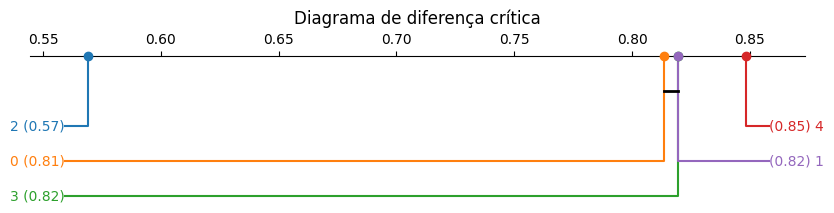

In [ ]:
plt.figure(figsize=(10, 2), dpi=100)
plt.title('Diagrama de diferença crítica')
sp.critical_difference_diagram([results["KNN"].mean(), results["SVM"].mean(), results["NB"].mean(), results["RF"].mean(), results["XGB"].mean()], test_results)
